## Import Libraries

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Load dataset

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

## Data Points and Features

In [5]:
type(boston_dataset.data)

numpy.ndarray

In [6]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# Prices in Thousands(000)
#boston_dataset.target

## Data Exploration with Pandas DataFrames

In [8]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [9]:
data['PRICE'] = boston_dataset.target

In [10]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
data.head() # Rows at top of datafrme look like this 
data.tail() # Rows at bottom of datafrme look like this 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [12]:
data.count() # show number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [13]:
# this method of checking for missing values belongs to Pandas
pd.isnull(data).any() 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
# this method of checking for missing values pertains to Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising data - Histogram, Distributions and Bar charts

Text(0, 0.5, 'Number of Houses')

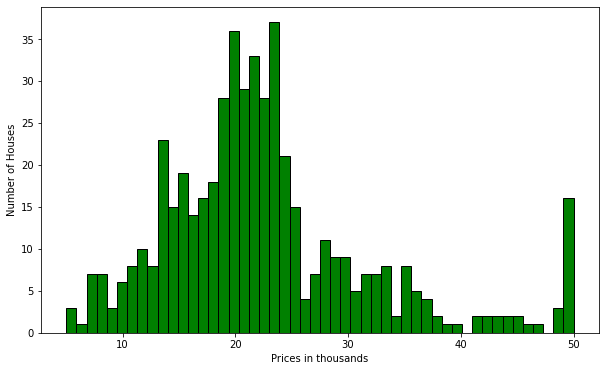

In [15]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='green')
plt.xlabel('Prices in thousands')
plt.ylabel('Number of Houses')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


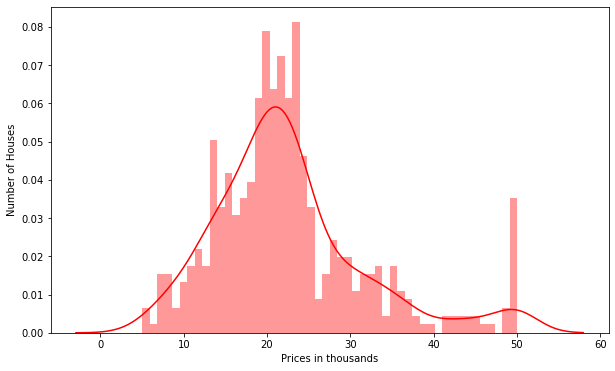

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, hist=True, kde=True, color='red')
plt.xlabel('Prices in thousands')
plt.ylabel('Number of Houses')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


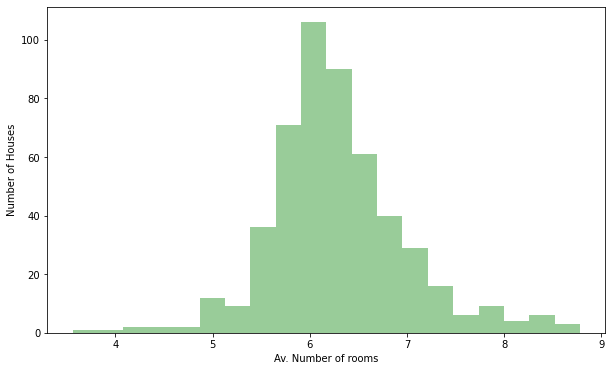

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data['RM'], bins=20, hist=True, kde=False, color='green')
plt.xlabel('Av. Number of rooms')
plt.ylabel('Number of Houses')
plt.show()

In [18]:
data['RM'].mean()

6.284634387351787

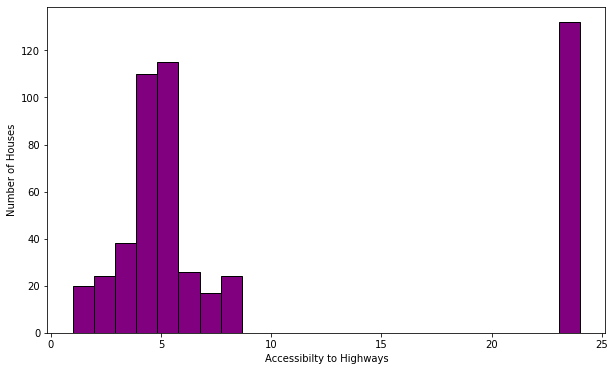

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black', color='purple')
plt.xlabel('Accessibilty to Highways')
plt.ylabel('Number of Houses')
plt.show()

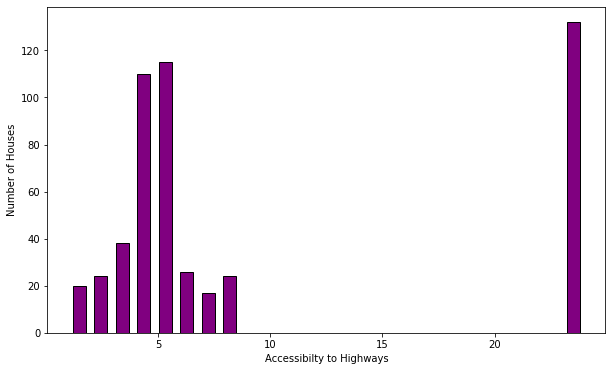

In [20]:
frequency = data['RAD'].value_counts()
# type(frequency)
# frequency.axes[0]
# frequency.index
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec='black', color='purple', rwidth=0.6)
plt.xlabel('Accessibilty to Highways')
plt.ylabel('Number of Houses')
#plt.bar(frequency.index, height=frequency, )
plt.show()

In [21]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [22]:
data.mean()
data.median()
data.min()
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [23]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho_{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [24]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [25]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [26]:
data.corr() ## Pearson correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [27]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'CRIM'),
  Text(0, 1.5, 'ZN'),
  Text(0, 2.5, 'INDUS'),
  Text(0, 3.5, 'CHAS'),
  Text(0, 4.5, 'NOX'),
  Text(0, 5.5, 'RM'),
  Text(0, 6.5, 'AGE'),
  Text(0, 7.5, 'DIS'),
  Text(0, 8.5, 'RAD'),
  Text(0, 9.5, 'TAX'),
  Text(0, 10.5, 'PTRATIO'),
  Text(0, 11.5, 'B'),
  Text(0, 12.5, 'LSTAT'),
  Text(0, 13.5, 'PRICE')])

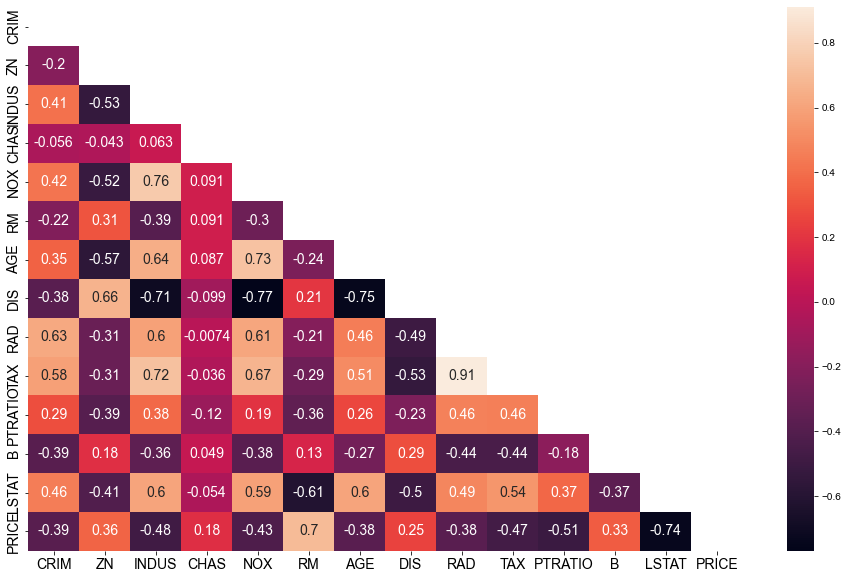

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Text(0, 0.5, 'NOX - Nitric Oxide Pollution')

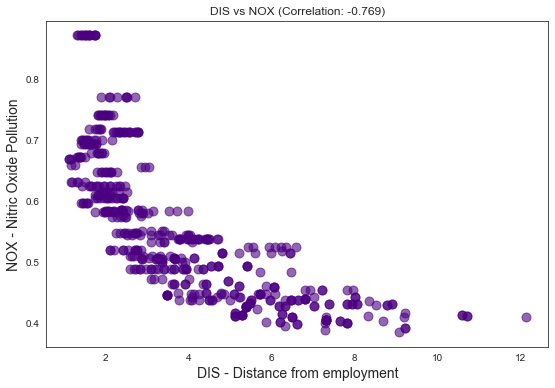

In [29]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation: {nox_dis_corr})')
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)

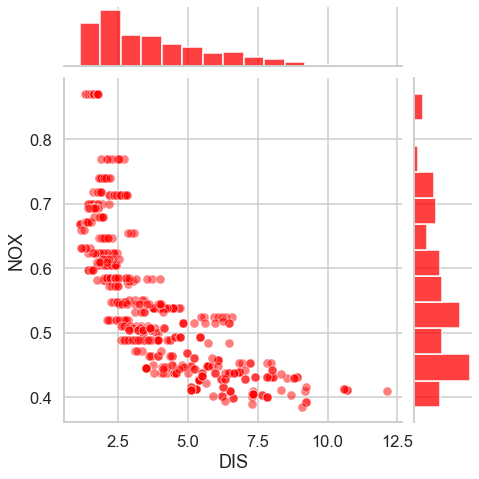

In [30]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='red', joint_kws={'alpha':0.5})

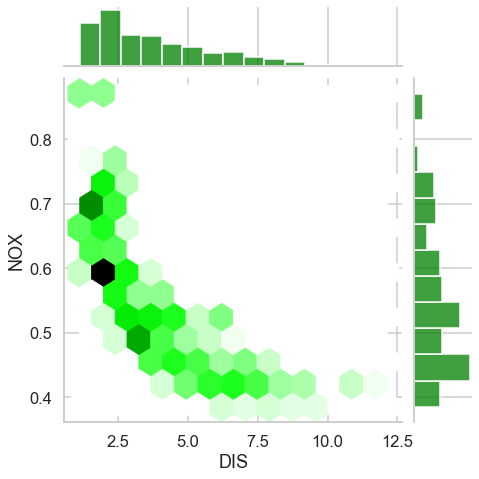

In [31]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', height=7, color='green')

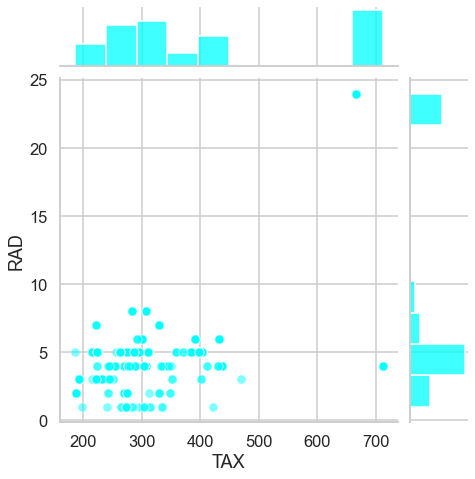

In [32]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='cyan', joint_kws={'alpha':0.5})

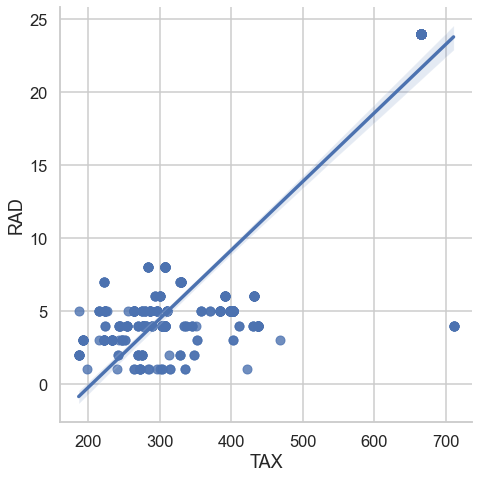

In [33]:
sns.lmplot(x='TAX', y='RAD', data=data, height=7)

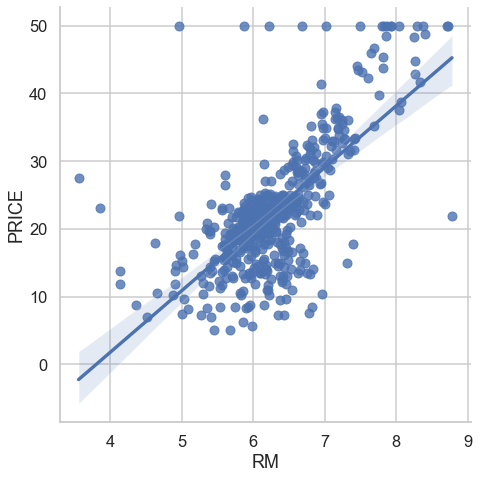

In [34]:
# Challenge: Create a scatter plot btw house prices and number of rooms

sns.lmplot(x='RM', y='PRICE', data=data, height=7)

Text(0, 0.5, 'PRICE')

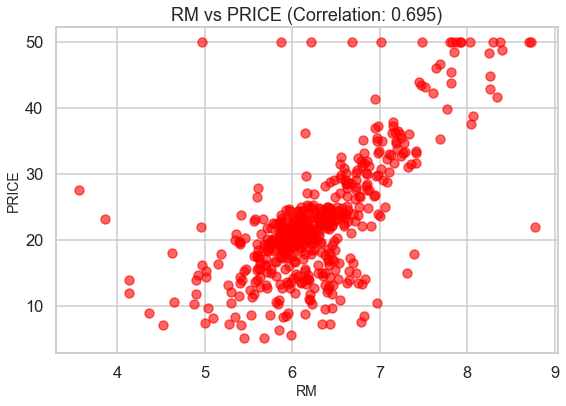

In [35]:
nox_dis_corr = round(data['PRICE'].corr(data['RM']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='red')
plt.title(f'RM vs PRICE (Correlation: {nox_dis_corr})')
plt.xlabel('RM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)

In [36]:
%%time
# sns.pairplot(data)

Wall time: 0 ns


In [37]:
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

## Training & Test Dataset Split

In [38]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, 
                                                    random_state=10)

# % len of training set
len(X_train)/len(features)

0.7984189723320159

In [39]:
# % len of test set
len(X_test)/len(features)

0.2015810276679842

In [40]:
### OR 
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [41]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Challenge: Prit out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [42]:
from math import log

In [43]:
y_log = np.log(data['PRICE'])

In [44]:
y_log.skew()

-0.33032129530987864

Text(0.5, 1.0, 'Log price with skew -0.33032129530987864')

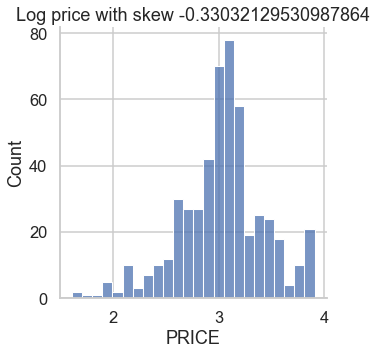

In [45]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')

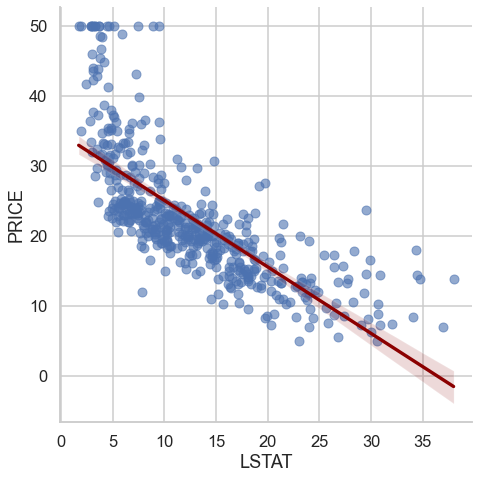

In [46]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})

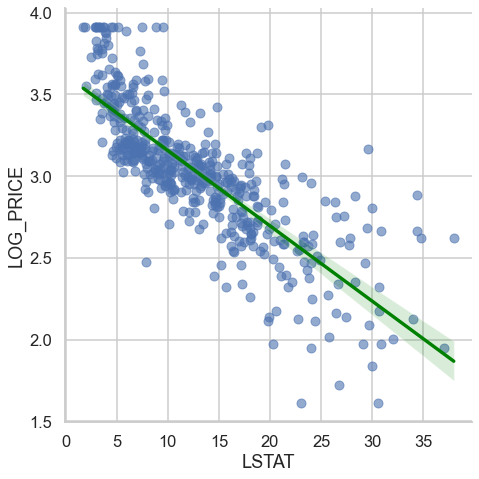

In [47]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'green'})

## Regression using log prices

In [48]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, 
                                                    random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [49]:
# Charles River  Property Premium
np.e**0.080331

1.0836456950439142

## p-values & Evaluating Coefficients

In [50]:
x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
#results.params
#results.pvalues
pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + \cdots + \alpha_{12}LSTAT  $$
$$ VIF_{TAX} = \frac{1}{(1 - R_{TAX}^2)} $$

In [51]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)
# type(x_incl_const)

1.7145250443932485

In [52]:
# Challenge: Print out the number of columns in x_incl_const
print(len(x_incl_const.columns))
print(x_incl_const.shape[1])

14
14


In [53]:
# Challenge: write a for loop that prints out all the VIFs for all the features

for i in range(x_incl_const.shape[1]):
    print(variance_inflation_factor(exog=x_incl_const.values, exog_idx=i))
print('All done!!!')

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034
All done!!!


In [54]:
# We could save this in a variable as a list
vif = []
for i in range(x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [55]:
# Another way to do the above
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=i)
       for i in range(x_incl_const.shape[1])]
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [56]:
pd.DataFrame({'coef_name': x_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification & the BIC

In [57]:
# Original model with log prices and all features

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

# Challenge: find and cheack official docs for results objects and print out BIC and rsquared
print('BIC is', results.bic)
print('R-squared is', results.rsquared)


BIC is -139.74997769478875
R-squared is 0.7930234826697582


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
# Reduced model #1 excluding INDUS
x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

# Challenge: find and cheack official docs for results objects and print out BIC and rsquared
print('BIC is', results.bic)
print('R-squared is', results.rsquared)

BIC is -145.14508855591163
R-squared is 0.7927126289415163


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
# Reduced model #2 excluding INDUS and AGE
x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

coef_minus_indus_age = pd.DataFrame({'coef':results.params, 'p-values':round(results.pvalues,3)})

# Challenge: find and cheack official docs for results objects and print out BIC and rsquared
print('BIC is', results.bic)
print('R-squared is', results.rsquared)

BIC is -149.49934294224656
R-squared is 0.7918657661852815


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
frames = [org_coef, coef_minus_indus, coef_minus_indus_age]
pd.concat(frames, axis=1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residual Plots

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


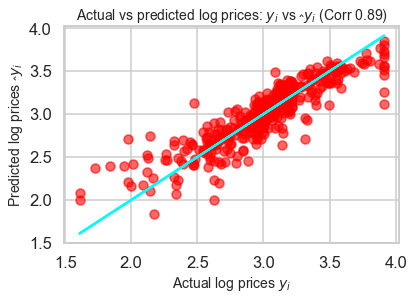

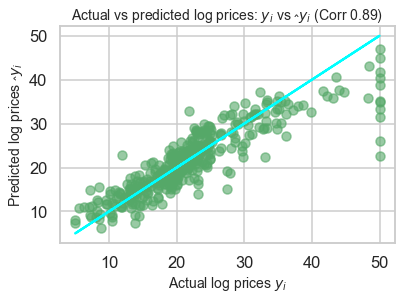

In [61]:
# Modified Model: 
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, 
                                                    random_state=10)

# Using statsmodel
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
#results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)

plt.scatter(x=y_train, y=results.fittedvalues, c='red', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.title(f'Actual vs predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=14)
plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='g', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.title(f'Actual vs predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=14)
plt.show()


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


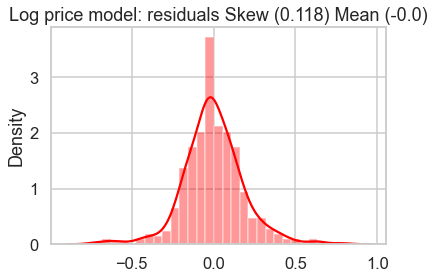

In [62]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='red')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


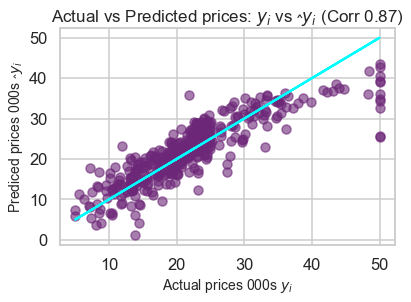

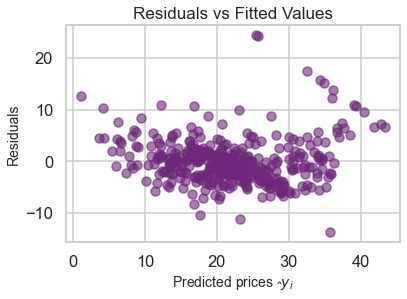

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


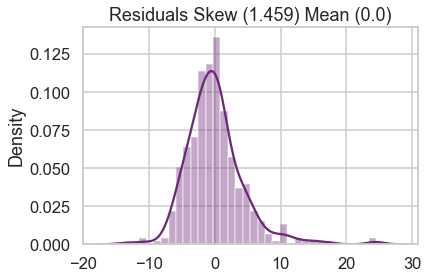

In [65]:
# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#6D2778', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#6D2778', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='#6D2778')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)